## import the necessaryLiberaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

## Imprting Data

In [2]:
dataset = pd.read_excel("/content/WAR data set.xlsx")

In [3]:
dataset.head()

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L),Water Absorption reduction (%)
0,35,9.5,0.147273,3,33.944,20.0,15.0
1,25,8.2,0.050909,3,25.458,20.0,8.0
2,30,9.5,0.550000,3,33.944,20.0,22.0
3,30,9.5,0.550000,7,33.944,20.0,27.3
4,30,9.5,0.550000,10,33.944,20.0,28.6


In [4]:
dataset.shape

(121, 7)

## EDA- Exploratory data analysis

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temprature(℃)                   121 non-null    int64  
 1   PH                              121 non-null    float64
 2   CaCl₂ (mol/L)                   121 non-null    float64
 3   Soaking Time (days)             121 non-null    int64  
 4   Converted Enzyme Conc (g/L)     121 non-null    float64
 5   Urea Conc (g/L)                 121 non-null    float64
 6   Water Absorption reduction (%)  121 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 6.7 KB


In [6]:
dataset.isnull().sum()

,0
Temprature(℃),0
PH,0
CaCl₂ (mol/L),0
Soaking Time (days),0
Converted Enzyme Conc (g/L),0
Urea Conc (g/L),0
Water Absorption reduction (%),0


In [7]:
dataset.describe()
print(dataset.describe().to_string(float_format='{:.4f}'.format))

       Temprature(℃)       PH  CaCl₂ (mol/L)  Soaking Time (days)  Converted Enzyme Conc (g/L)  Urea Conc (g/L)  Water Absorption reduction (%)
count       121.0000 121.0000       121.0000             121.0000                     121.0000         121.0000                        121.0000
mean         28.9091   8.1107         0.5168               5.0248                      36.7044          30.7421                         18.1337
std           7.4911   1.0761         0.3154               4.5743                       5.7356          14.1038                         15.4727
min          15.0000   6.0000         0.0300               1.0000                      21.2150          12.0000                          0.0000
25%          25.0000   7.0000         0.3000               1.0000                      33.9440          20.0000                          7.6000
50%          25.0000   8.0000         0.5000               5.0000                      34.9000          30.0000                         

## Data visualization

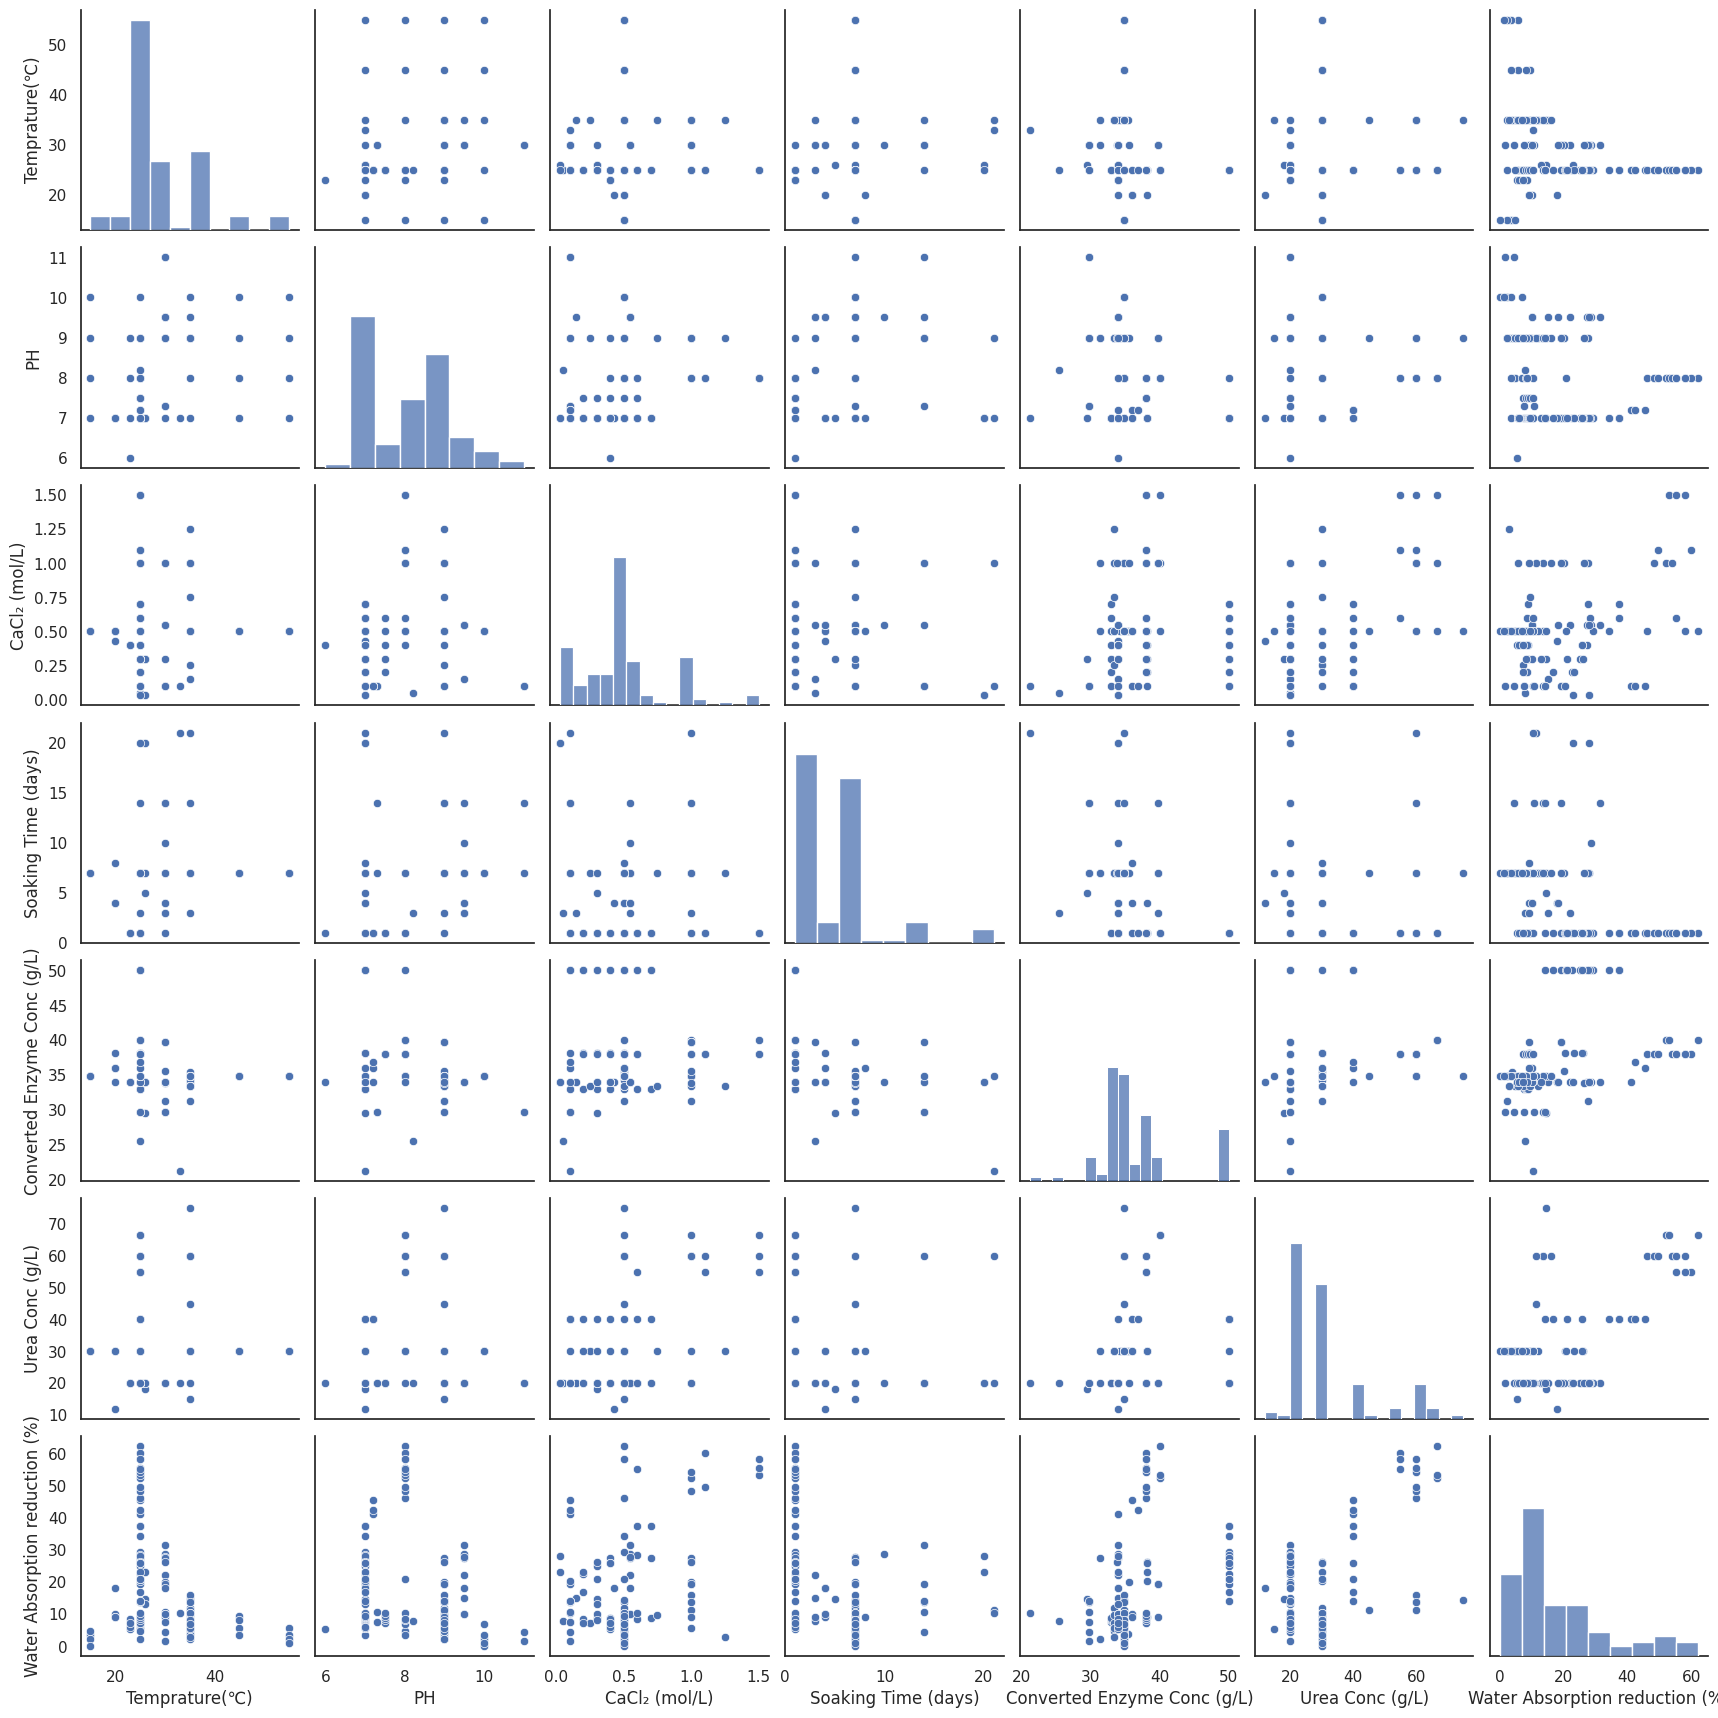

<Figure size 1000x1000 with 0 Axes>

In [54]:
sns.pairplot(dataset)
sns.set_style("white")
plt.figure(figsize=(10,10))
plt.show()

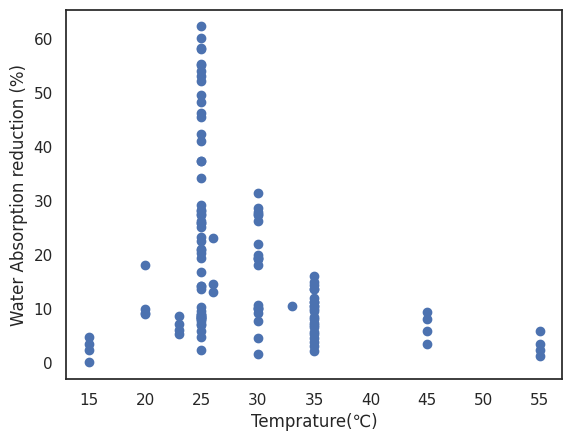

In [9]:
plt.scatter(dataset['Temprature(℃)'],dataset['Water Absorption reduction (%)'])
sns.set_style("white")
plt.xlabel('Temprature(℃)')
plt.ylabel('Water Absorption reduction (%)')
plt.show()

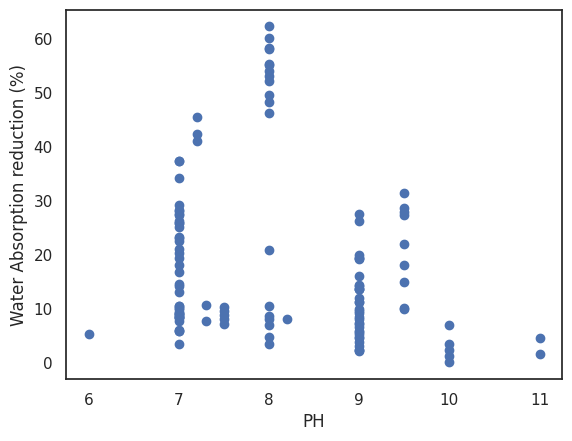

In [10]:
plt.scatter(dataset['PH'],dataset['Water Absorption reduction (%)'])
sns.set_style("white")
plt.xlabel('PH')
plt.ylabel('Water Absorption reduction (%)')
plt.show()

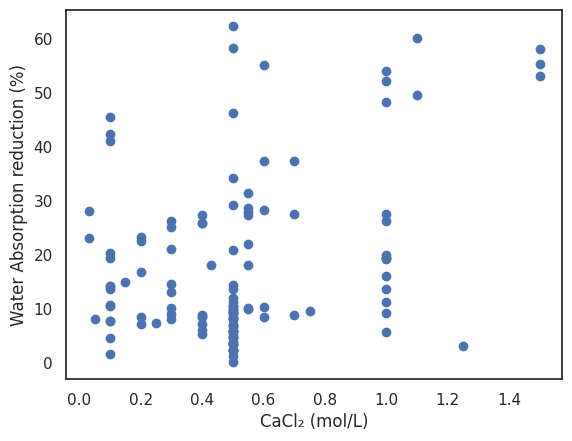

In [11]:
plt.scatter(dataset['CaCl₂ (mol/L)'],dataset['Water Absorption reduction (%)'])
sns.set_style("white")
plt.xlabel('CaCl₂ (mol/L)')
plt.ylabel('Water Absorption reduction (%)')
plt.show()

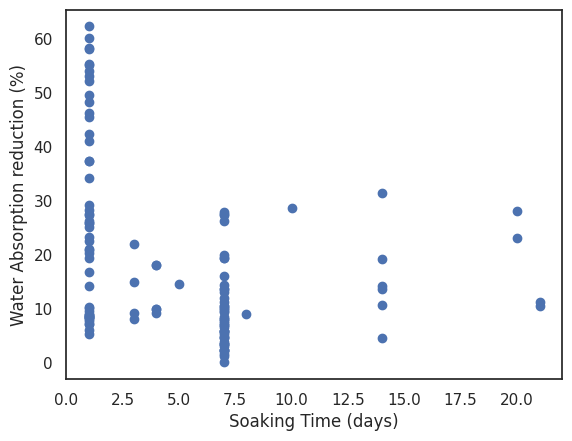

In [12]:
plt.scatter(dataset['Soaking Time (days)'],dataset['Water Absorption reduction (%)'])
sns.set_style("white")
plt.xlabel('Soaking Time (days)')
plt.ylabel('Water Absorption reduction (%)')
plt.show()

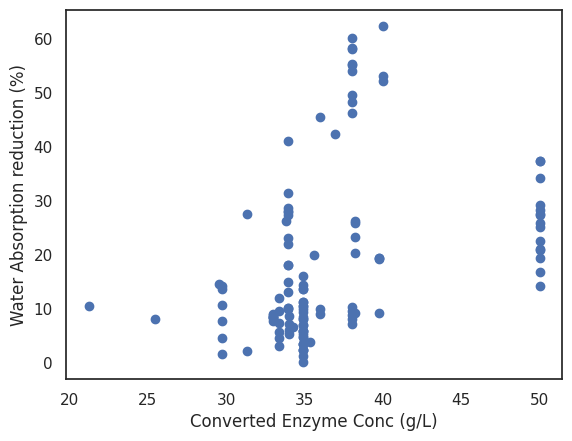

In [13]:
plt.scatter(dataset['Converted Enzyme Conc (g/L)'],dataset['Water Absorption reduction (%)'])
sns.set_style("white")
plt.xlabel('Converted Enzyme Conc (g/L)')
plt.ylabel('Water Absorption reduction (%)')
plt.show()

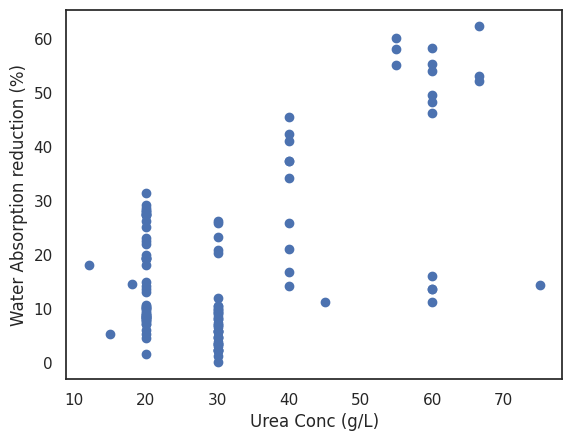

In [14]:
plt.scatter(dataset['Urea Conc (g/L)'],dataset['Water Absorption reduction (%)'])
sns.set_style("white")
plt.xlabel('Urea Conc (g/L)')
plt.ylabel('Water Absorption reduction (%)')
plt.show()

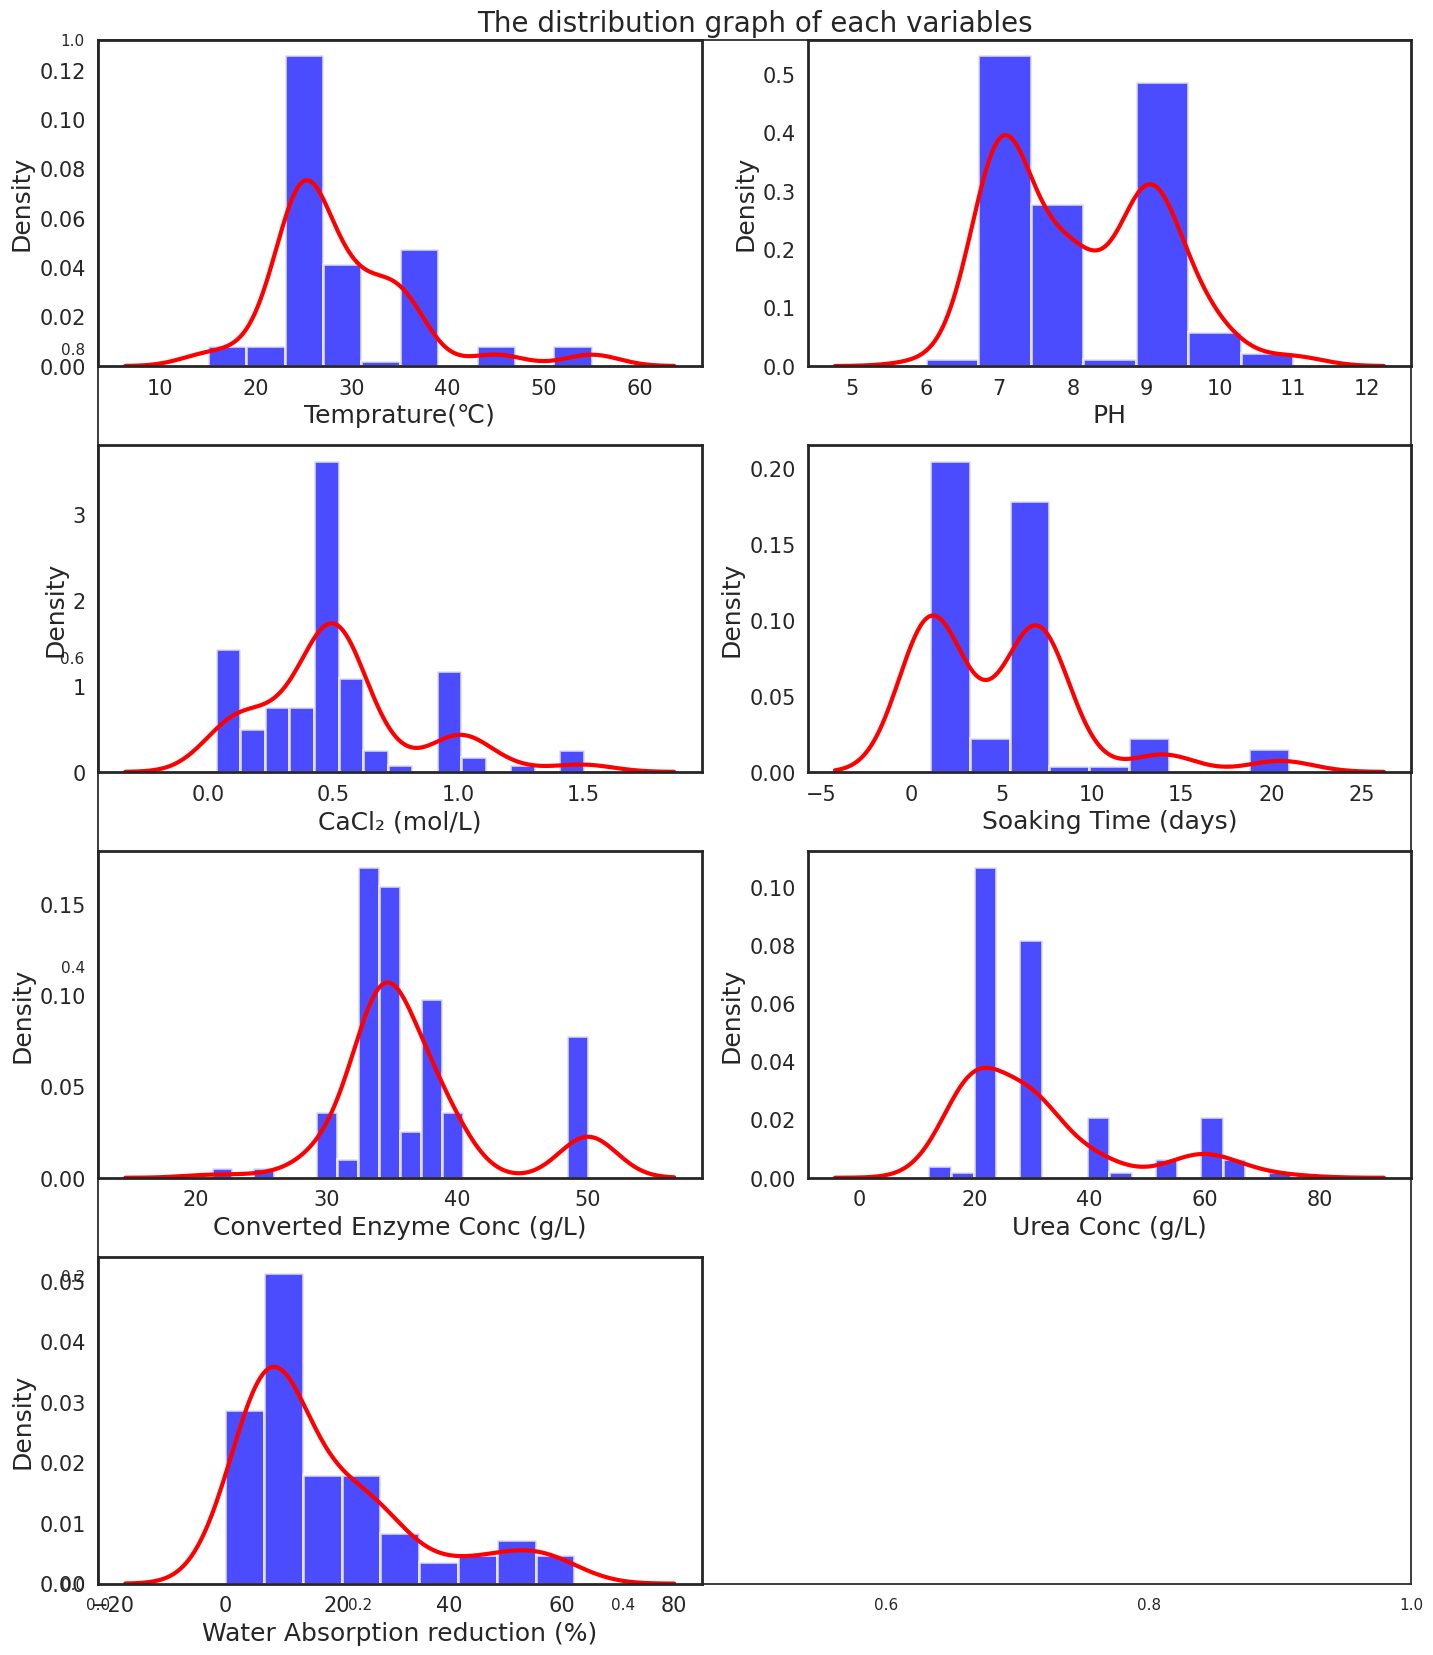

In [53]:
plt.figure(figsize=(15,17), facecolor = 'white')
plotnumber = 1
plt.title('The distribution graph of each variables', fontsize=20)
sns.set_style("white")
for column in dataset.columns:
    ax = plt.subplot(4,2,plotnumber)
    sns.distplot(dataset[column], hist_kws={"linewidth": 2, "color": "blue", "alpha": 0.7}, kde_kws={"color": "red", "linewidth": 3})
    plt.xlabel(column,fontsize=18)
    plt.ylabel('Density', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=15, width=2, length=5)
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    plotnumber+=1
plt.tight_layout()
plt.show()

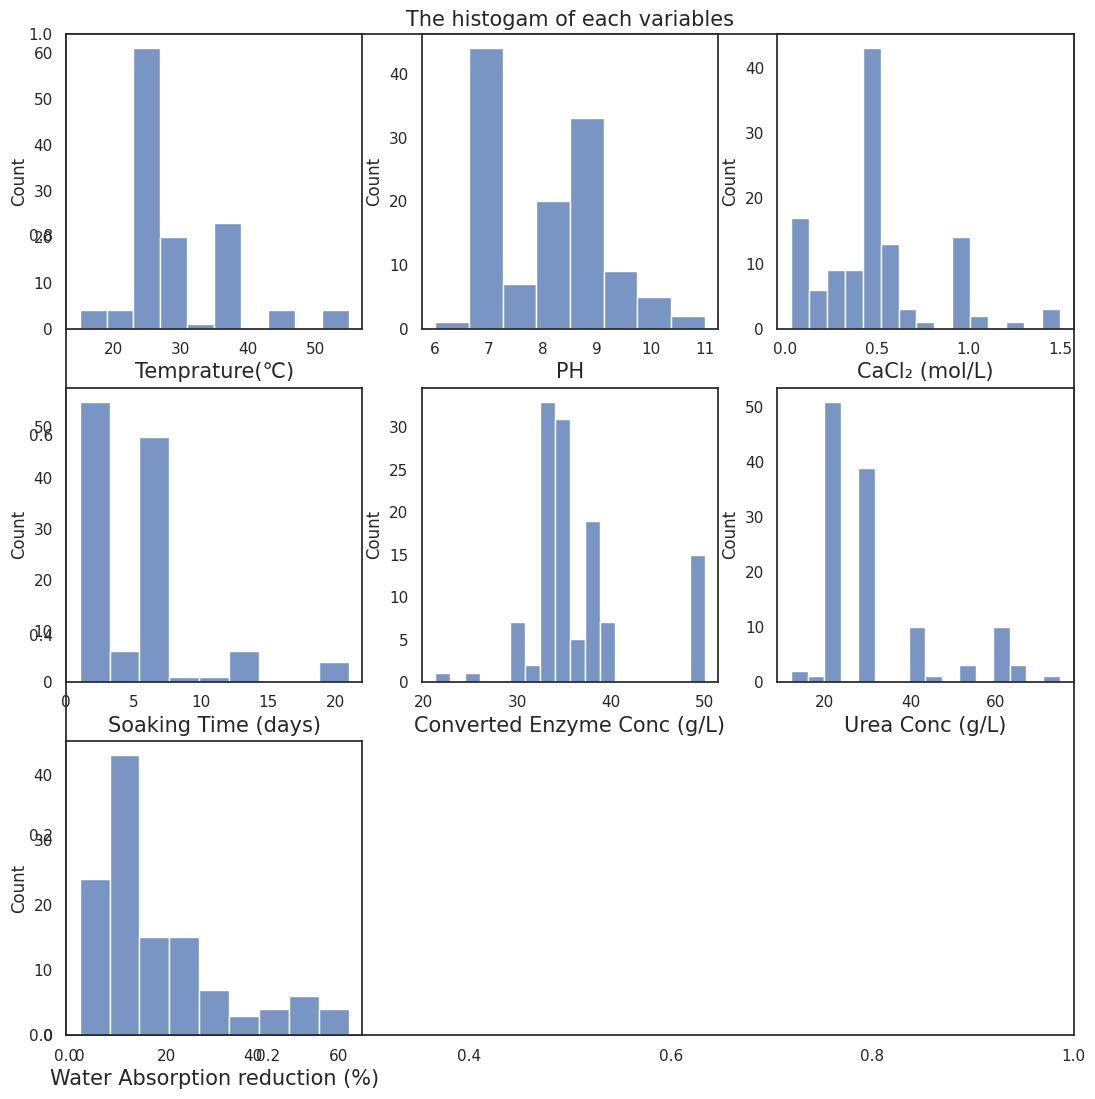

In [16]:
plt.figure(figsize=(13,13), facecolor="white")
plt.title('The histogam of each variables', fontsize=15)
sns.set_style("white")
plotnumber=1
for column in dataset.columns:
   plt.subplot(3,3,plotnumber)
   sns.histplot(dataset[column])
   plt.xlabel(column, fontsize=15)
   plotnumber+=1
plt.show()

#check outlier

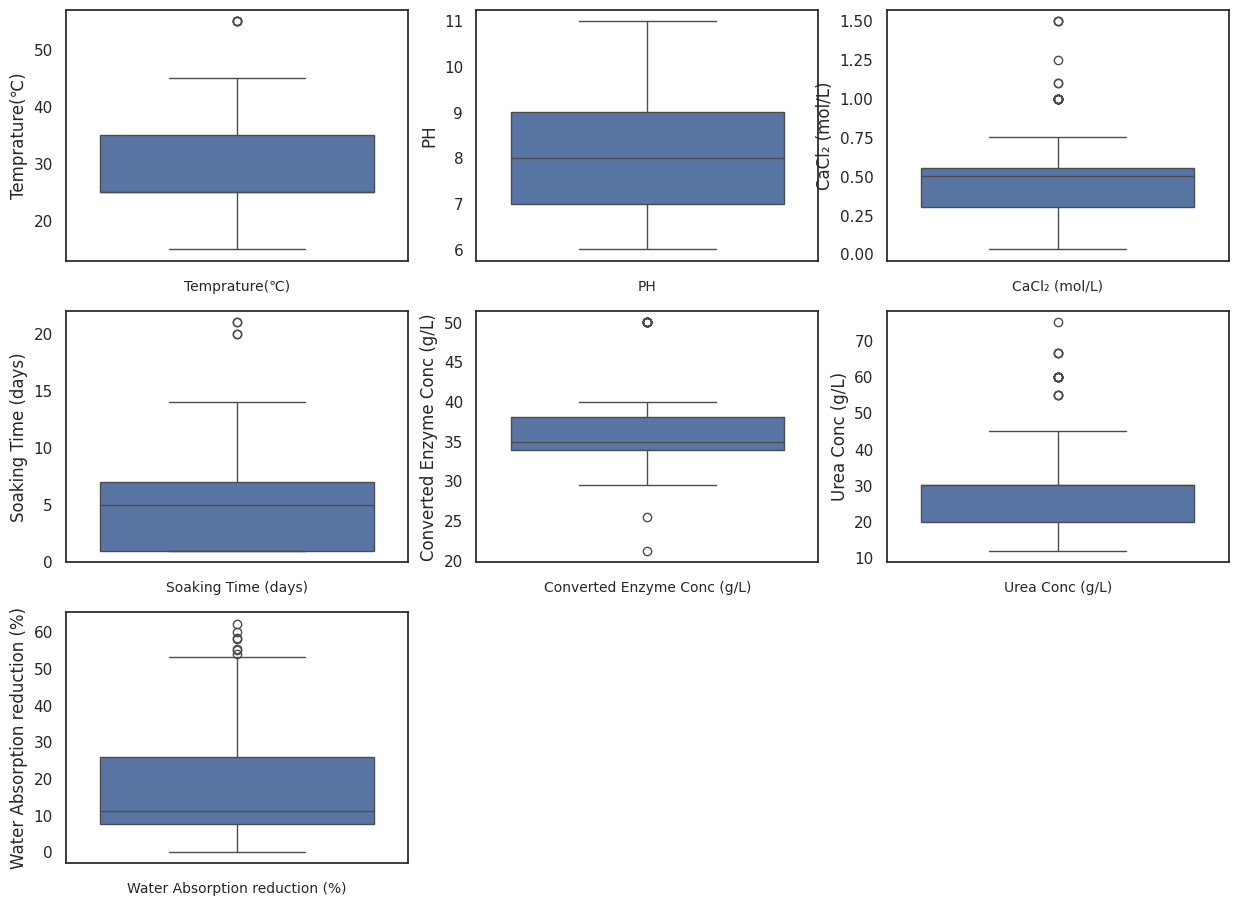

In [17]:
sns.set_style("white")
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in dataset.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot((dataset[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

## Correlation Matrix

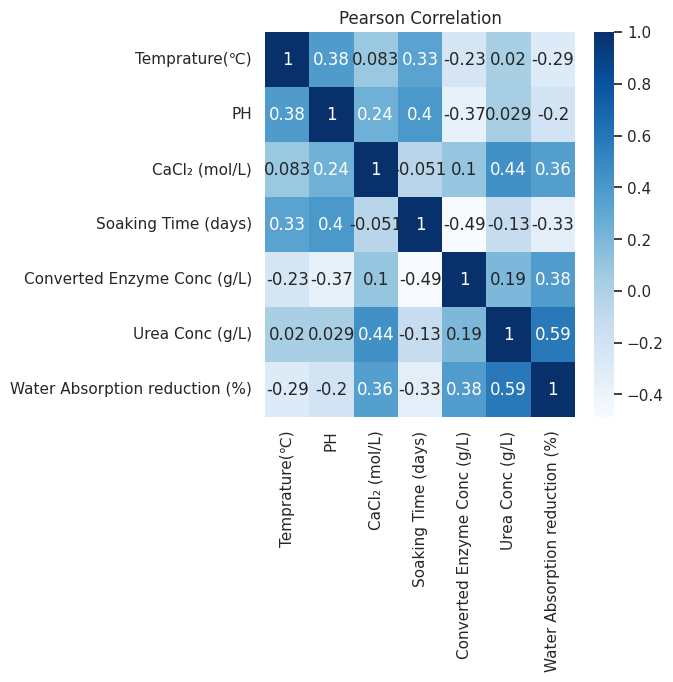

In [18]:
sns.set_style("white")
plt.figure(figsize=(5,5))
plt.title('Pearson Correlation')
sns.heatmap(dataset.corr(),annot=True, cmap = 'Blues', cbar=True)
plt.show()

In [19]:
dataset.corr()
print(dataset.corr().to_string(float_format='{:.4f}'.format))

                                Temprature(℃)      PH  CaCl₂ (mol/L)  Soaking Time (days)  Converted Enzyme Conc (g/L)  Urea Conc (g/L)  Water Absorption reduction (%)
Temprature(℃)                          1.0000  0.3811         0.0833               0.3332                      -0.2319           0.0203                         -0.2926
PH                                     0.3811  1.0000         0.2428               0.3964                      -0.3664           0.0291                         -0.2041
CaCl₂ (mol/L)                          0.0833  0.2428         1.0000              -0.0507                       0.1039           0.4440                          0.3591
Soaking Time (days)                    0.3332  0.3964        -0.0507               1.0000                      -0.4867          -0.1322                         -0.3317
Converted Enzyme Conc (g/L)           -0.2319 -0.3664         0.1039              -0.4867                       1.0000           0.1872                         

# Defining dependent and independent variables

In [20]:
X = dataset.drop('Water Absorption reduction (%)', axis = 1)
y = dataset['Water Absorption reduction (%)']

# Spliting the data for training and testing

In [21]:
# Train _Test Split
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (96, 6)
Testing set size: (13, 6)
Validation set size: (12, 6)


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_train

array([[-0.51209156, -1.0781941 , -0.05204704, -0.91387126,  2.31366223,
        -0.76841617],
       [-1.1948803 , -1.0781941 , -0.05204704, -0.21388476, -0.13632955,
        -0.03338277],
       [ 0.85348593, -0.16139487, -0.05204704,  0.48610173, -0.32288486,
        -0.03338277],
       [ 0.85348593,  0.75540437, -0.05204704,  0.48610173, -0.32288486,
        -0.03338277],
       [-0.51209156, -1.0781941 , -1.40661702, -0.91387126,  0.25104603,
        -0.03338277],
       [ 0.17069719,  0.75540437,  1.64116543,  0.48610173, -0.51315507,
        -0.76841617],
       [ 2.21906341,  1.67220361, -0.05204704,  0.48610173, -0.32288486,
        -0.03338277],
       [-0.51209156, -0.61979448, -0.39068954, -0.91387126,  0.21839478,
        -0.76841617],
       [ 0.58037043, -1.0781941 , -1.40661702,  3.75270539, -2.71236056,
        -0.76841617],
       [ 0.17069719,  1.21380399,  0.1172742 ,  0.48610173, -0.48980561,
        -0.76841617],
       [-1.87766904,  0.75540437, -0.05204704,  0.

#Normalization of the data

In [24]:
X_normal = (X - X.min()) / (X.max() - X.min())

In [25]:
X_normal

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L)
0,0.500,0.70,0.079777,0.10,0.442209,0.126984
1,0.250,0.44,0.014224,0.10,0.147403,0.126984
2,0.375,0.70,0.353741,0.10,0.442209,0.126984
3,0.375,0.70,0.353741,0.30,0.442209,0.126984
4,0.375,0.70,0.353741,0.45,0.442209,0.126984
...,...,...,...,...,...,...
116,0.250,0.40,0.727891,0.00,0.583116,0.682540
117,0.250,0.40,1.000000,0.00,0.583116,0.682540
118,0.250,0.40,0.319728,0.00,0.583116,0.761905
119,0.250,0.40,0.659864,0.00,0.583116,0.761905


## Linear Regression model

In [26]:
from sklearn.linear_model import LinearRegression
LReg = LinearRegression()

In [27]:
LReg.fit(X_train ,y_train)

LinearRegression()

In [28]:
LReg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [29]:
y_pred_train = LReg.predict(X_train)
y_pred_test = LReg.predict(X_test)
y_pred_val= LReg.predict(X_val)

#Evaluation of the model

In [30]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# Evaluate on the training set
print("Training Set Metrics:")
print(f'The RMSE on the training dataset is: {sqrt(mean_squared_error(y_train, LReg.predict(X_train))):.4f}')
print(f'The MSE on the training dataset is: {(mean_squared_error(y_train, LReg.predict(X_train))):.4f}')
print(f'The MAE on the training daset is: {mean_absolute_error(y_train, LReg.predict(X_train)):.4f}')
print(f'The r2_score on the training dataset is: {r2_score(y_train, LReg.predict(X_train)):.4f}')
print("-" * 30)

# Evaluate on the testing set
print("Testing Set Metrics:")
print(f'The RMSE on the testing dataset is: {sqrt(mean_squared_error(y_test, LReg.predict(X_test))):.4f}')
print(f'The MSE on the testing dataset is: {(mean_squared_error(y_test, LReg.predict(X_test))):.4f}')
print(f'The MAE on the testing dataset is: {mean_absolute_error(y_test, LReg.predict(X_test)):.4f}')
print(f'The r2_score on the testing dataset is: {r2_score(y_test, LReg.predict(X_test)):.4f}')
print("-" * 30)

# Evaluate on the validation set
print("Validation Set Metrics:")
print(f'The RMSE on the validation dataset is: {sqrt(mean_squared_error(y_val, LReg.predict(X_val))):.4f}')
print(f'The MSE on the validation dataset is: {(mean_squared_error(y_val, LReg.predict(X_val))):.4f}')
print(f'The MAE on the validation dataset is: {mean_absolute_error(y_val, LReg.predict(X_val)):.4f}')
print(f'The r2_score on the validation dataset is: {r2_score(y_val, LReg.predict(X_val)):.4f}')

Training Set Metrics:
The RMSE on the training dataset is: 10.8370
The MSE on the training dataset is: 117.4395
The MAE on the training daset is: 8.8267
The r2_score on the training dataset is: 0.4950
------------------------------
Testing Set Metrics:
The RMSE on the testing dataset is: 11.7064
The MSE on the testing dataset is: 137.0394
The MAE on the testing dataset is: 9.2662
The r2_score on the testing dataset is: 0.1516
------------------------------
Validation Set Metrics:
The RMSE on the validation dataset is: 272.2537
The MSE on the validation dataset is: 74122.0581
The MAE on the validation dataset is: 234.8161
The r2_score on the validation dataset is: -240.7791


## Actual vs Predicted Capacity for test data

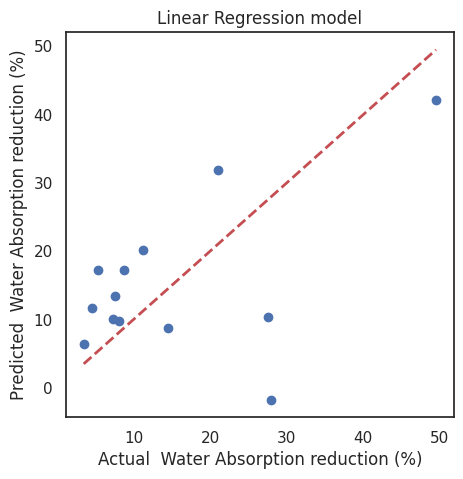

In [31]:
sns.set_style("white")
plt.figure(figsize=(5,5))
plt.title('Linear Regression model')
plt.ylabel("Predicted  Water Absorption reduction (%)")
plt.xlabel("Actual  Water Absorption reduction (%)")
plt.scatter(y_test,y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

## Actual vs Predicted Capacity for train data

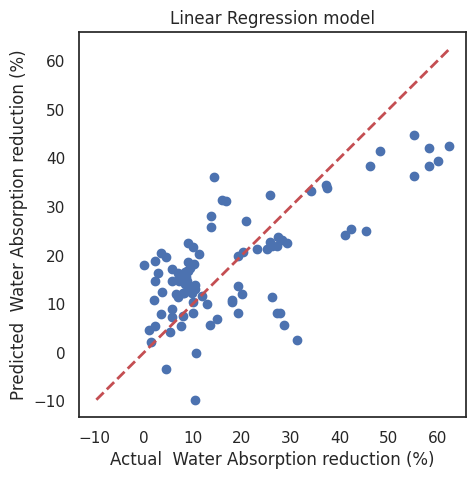

In [32]:
plt.figure(figsize=(5,5))
plt.scatter(y_train,y_pred_train )
plt.title('Linear Regression model')
plt.ylabel("Predicted  Water Absorption reduction (%)")
plt.xlabel("Actual  Water Absorption reduction (%)")
min_val = min(y_train.min(), y_pred_train.min())
max_val = max(y_train.max(), y_pred_train.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

#check the model in the single row

In [33]:
X1 = np.array(X)

In [34]:
X1[0].reshape(1,6)

array([[35.        ,  9.5       ,  0.14727273,  3.        , 33.944     ,
        20.        ]])

In [35]:
LReg.predict(scaler.transform(X1[0].reshape(1,6)))

array([7.04377053])

#### The above result indicates what the model is predict but the resul of water absorption reduction form the exiperment is 15%

#Getting Coefficients and Intercept

In [36]:

coefficients = LReg.coef_
intercept = LReg.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-2.43415197 -0.94079342  1.90077876 -3.40992809  2.2032078   7.2210267 ]
Intercept: 17.735535368217054
